In [1]:
#importing libs
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
# Reading Excel file
df = pd.read_excel('Watson_data.xlsx',sheetname='Data')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Removing unnecessary columns

Some columns in whole dataset/dataframe is unnecessary.

1. Like EmployeeCount column is always 1.So,this feature doesn't help.
2. EmployeeNumber is just unique number for each Employee which is also not useful.
3. Every Employee is over 18 so it's also not useful.

In [3]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Mapping Binary valued Columns( Like yes/no,male/female) to 0/1

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [5]:
#df['Gender'],df['Attrition'],df['Gender']

In [6]:
regr = linear_model.LinearRegression()

In [7]:
def fit_linear_model_and_return_r_2_square(X_name,Y_name):
    X = df[[X_name]]
    Y = df[[Y_name]]
    regr.fit(X,Y)
    return regr.score(X,Y)

In [8]:
UniFeatures = df.columns
UniFeatures = list(UniFeatures)

In [9]:
removefeatures = ['Department','BusinessTravel','EducationField','EnvironmentSatisfaction','JobRole','MaritalStatus','MonthlyIncome']
for i in removefeatures:
    UniFeatures.remove(i)

In [10]:
R_sqaure_of_UniFeatures = []
for i in UniFeatures:
    R_sqaure_of_UniFeatures.append([i,fit_linear_model_and_return_r_2_square(i,'MonthlyIncome')])
sorted(R_sqaure_of_UniFeatures,key=lambda x:x[1],reverse=True)

[['JobLevel', 0.90306992555980259],
 ['TotalWorkingYears', 0.59736397010559661],
 ['YearsAtCompany', 0.26448888197942461],
 ['Age', 0.24785916980965295],
 ['YearsInCurrentRole', 0.13236329476944894],
 ['YearsSinceLastPromotion', 0.11900957083419683],
 ['YearsWithCurrManager', 0.11839027790456835],
 ['Attrition', 0.02554869209700783],
 ['NumCompaniesWorked', 0.022354799812446258],
 ['Education', 0.0090175301842538857],
 ['MonthlyRate', 0.0012119885646063588],
 ['Gender', 0.0010149634995575418],
 ['WorkLifeBalance', 0.00094145149382995896],
 ['PercentSalaryHike', 0.0007435758064530118],
 ['RelationshipSatisfaction', 0.0006694346975643084],
 ['TrainingTimesLastYear', 0.00047246573016501703],
 ['PerformanceRating', 0.00029309913326758252],
 ['DistanceFromHome', 0.00028949132999012139],
 ['HourlyRate', 0.00024946005087644885],
 ['JobInvolvement', 0.0002332184306049756],
 ['DailyRate', 5.9398756456663371e-05],
 ['JobSatisfaction', 5.1218961149013253e-05],
 ['OverTime', 3.7079396714267972e-05

In [11]:
def fit_poly_model_and_return_r_2_square(X_name,Y_name,degree):
    poly = PolynomialFeatures(degree)
    X = df[[X_name]]
    Y = df[[Y_name]]    
    X = poly.fit_transform(X)
    regr.fit(X,Y)
    return regr.score(X,Y)

In [12]:
R_sqaure_of_UniFeatures = []
for i in UniFeatures:
    R_sqaure_of_UniFeatures.append([i,fit_poly_model_and_return_r_2_square(i,'MonthlyIncome',2)])
sorted(R_sqaure_of_UniFeatures,key=lambda x:x[1],reverse=True)

[['JobLevel', 0.91859927133836505],
 ['TotalWorkingYears', 0.59830256115117564],
 ['YearsAtCompany', 0.26826096056801529],
 ['Age', 0.24809379104125007],
 ['YearsInCurrentRole', 0.1372154850664524],
 ['YearsSinceLastPromotion', 0.12308191260353218],
 ['YearsWithCurrManager', 0.12295637872826326],
 ['NumCompaniesWorked', 0.032799302522340534],
 ['Attrition', 0.02554869209700783],
 ['Education', 0.0092332261247166647],
 ['StockOptionLevel', 0.0068146186646586004],
 ['DistanceFromHome', 0.0028725327954288726],
 ['PercentSalaryHike', 0.0026147778570619895],
 ['MonthlyRate', 0.0013193506188645676],
 ['WorkLifeBalance', 0.0010182849117329473],
 ['Gender', 0.0010149634995575418],
 ['RelationshipSatisfaction', 0.00094128100325030495],
 ['TrainingTimesLastYear', 0.00068432158879927485],
 ['JobInvolvement', 0.00067539415940531811],
 ['HourlyRate', 0.00025334182333269784],
 ['PerformanceRating', 0.00021744849504867769],
 ['DailyRate', 5.9398776756758309e-05],
 ['JobSatisfaction', 5.39190891979401

In [13]:
categorical_features = ['Department','BusinessTravel','EducationField','EnvironmentSatisfaction','JobRole','MaritalStatus']
for i in categorical_features:
    X = pd.get_dummies(df[[i]])
    regr.fit(X,df[['MonthlyIncome']])
    r2 = regr.score(X,df[['MonthlyIncome']])
    print (i,'R square Score',r2)

Department R square Score 0.00431533555628
BusinessTravel R square Score 0.00147531298601
EducationField R square Score 0.00660851782305
EnvironmentSatisfaction R square Score 3.91761795222e-05
JobRole R square Score 0.81598594166
MaritalStatus R square Score 0.00794013326889


In [86]:
# regression with jobrole categorical values
multi_features = df.ix[:,['JobLevel']]#,'TotalWorkingYears','YearsAtCompany','Age','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
multi_features = multi_features.join(pd.get_dummies(df[['JobRole']]))
print (multi_features.columns)
Y = df['MonthlyIncome']
multi_regr = linear_model.LinearRegression()
multi_regr.fit(multi_features,Y)
print(multi_regr.coef_,multi_regr.intercept_)
print ("R sqaure score of multivariant",multi_regr.score(multi_features,Y))

Index(['JobLevel', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object')
[ 3048.75114639  -644.48706233  -911.57462828 -1174.22587739  3427.26291582
  -801.87364856  3281.93645466 -1057.62106851  -806.71460994 -1312.70247548] 632.827738422
R sqaure score of multivariant 0.941536578221


In [15]:
# redundant features
# 'TotalWorkingYears'

In [16]:
# generating heatmap of correlation
import seaborn as sns
All_high_r2_features = df.ix[:, ['TotalWorkingYears','JobLevel','YearsAtCompany','Age','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
correlation_matrix = All_high_r2_features.corr('pearson')
sns.heatmap(correlation_matrix,annot=True,)

In [17]:
import matplotlib.pyplot as plt
def plot_regr(X_name,Y_name):
    X = df[[X_name]]
    Y = df[[Y_name]]
    regr.fit(X,Y)
    Y_pred = regr.predict(X)
    plt.plot(X,Y_pred,'r')
    plt.plot(X,Y,'bo',alpha=0.3)
    plt.xlabel(X_name)
    plt.ylabel(Y_name)

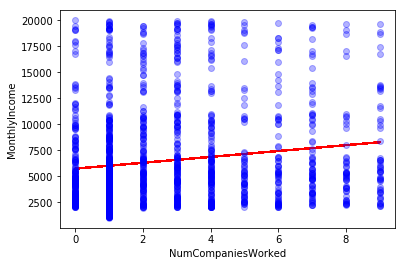

In [18]:
%matplotlib inline
#plot_regr('TotalWorkingYears','MonthlyIncome')
#plot_regr('YearsAtCompany','MonthlyIncome')
plot_regr('NumCompaniesWorked','MonthlyIncome')

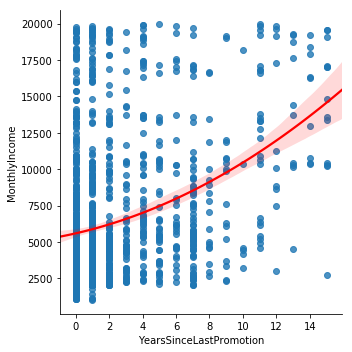

In [75]:
import matplotlib.pyplot as plt
def plot_ploy_regr(X_name,Y_name,degree):
    poly = PolynomialFeatures(degree)
    X_o = df[[X_name]]
    Y = df[[Y_name]]    
    X = poly.fit_transform(X_o)
    regr.fit(X,Y)
    Y_pred = regr.predict(X)
    aa = sns.lmplot(X_name,Y_name,df,order=2,line_kws={'color': 'red'})
    
plot_ploy_regr('YearsSinceLastPromotion','MonthlyIncome',2)

In [20]:
#ploting categorical data

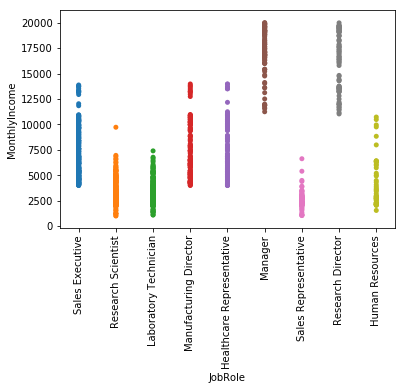

In [76]:
#sns.set(rc={'figure.figsize':(10,9)})
ax = sns.stripplot(x='JobRole',y='MonthlyIncome',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig('temp.png')